# k-Nearest Neighbor by hand
# kNN Analysis

In [1]:
import lib.confusion_average as ca
import lib.confusion_count as cc
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

##### Analysis by mean magnitude  
The algorithm to determine class by mean begins calculating the magnitude of each uncategorized point to each categorized point. The magnitudes are sorted from least to greatest. The assigned class has the least mean magnitude among all classes for a given k.  
Below is the analysis by mean magnitude.

###### Confusion matrix for each k  
The table below shows the confusion matrix for each k and the true and false positive rates.  

In [2]:
by_means = ca.confusion_matrix('./data/analyzed.csv', 
        'train_class', 'result_by_mag', 'M', 'B')
by_means.head()

,true_pos,true_neg,false_pos,false_neg,tp_rate,fp_rate
k,,,,,,
1,139,267,21,28,0.832335,0.072917
2,139,266,22,28,0.832335,0.076389
3,141,266,22,26,0.844311,0.076389
4,139,264,24,28,0.832335,0.083333
5,137,264,24,30,0.820359,0.083333


###### Analysis by means - ROC Plot

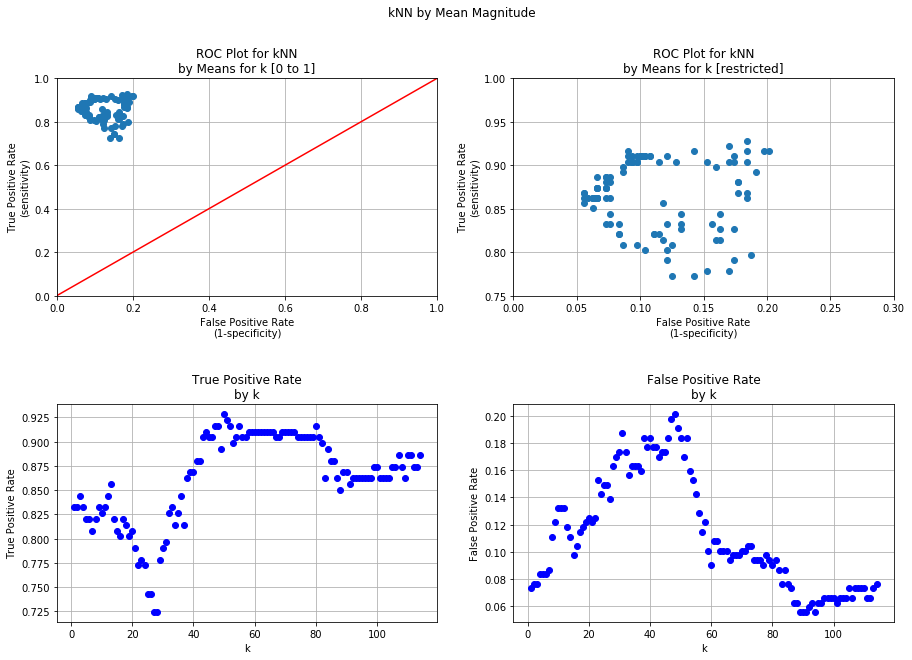

In [3]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, 
                wspace=None, hspace=0.5)
plt.suptitle('kNN by Mean Magnitude')
plt.subplot(221)
plt.plot(by_means['fp_rate'], by_means['tp_rate'],'o')
plt.plot([0,1],[0,1],'r-')
plt.title('ROC Plot for kNN\nby Means for k [0 to 1]')
plt.xlabel('False Positive Rate\n(1-specificity)')
plt.ylabel('True Positive Rate\n(sensitivity)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.subplot(222)
plt.plot(by_means['fp_rate'], by_means['tp_rate'],'o')
plt.plot([0,1],[0,1],'r-')
plt.title('ROC Plot for kNN\nby Means for k [restricted]')
plt.xlabel('False Positive Rate\n(1-specificity)')
plt.ylabel('True Positive Rate\n(sensitivity)')
plt.xlim(0, 0.3)
plt.ylim(0.75, 1)
plt.grid()

plt.subplot(223)
plt.plot(by_means.index, by_means['tp_rate'],'bo')
plt.title('True Positive Rate\nby k')
plt.xlabel('k')
plt.ylabel('True Positive Rate')
plt.grid()

plt.subplot(224)
plt.plot(by_means.index, by_means['fp_rate'],'bo')
plt.title('False Positive Rate\nby k')
plt.xlabel('k')
plt.ylabel('False Positive Rate')
plt.grid()

plt.show()

The false positive rate (1-specificity):   $Rate_{FP} = N_{FP} / (N_{FP} + N_{TN})$ plotted against the true postive rate (sensitivity):  $Rate_{TP} = N_{TP} / (N_{TP} + N_{FN})$ are used to find the optimal k (number of neighbors to evaluate). Where the optimal k maximizes sensitivity and minimizes specificity.   
The charts above show the true positive rate and false positive rate for all values of k.   
###### Informedness

In [4]:
informedness = by_means['tp_rate'] - by_means['fp_rate']
opt = informedness.idxmax()
est_tp = by_means['tp_rate'][opt]
est_fp = by_means['fp_rate'][opt]


The table shows the optimal k, and estimated true and false positive rates.  

|k|TPR|FPR|
|-|---|---|
|{{opt}}|{{np.round(est_tp,2)}}|{{np.round(est_fp,2)}}|  


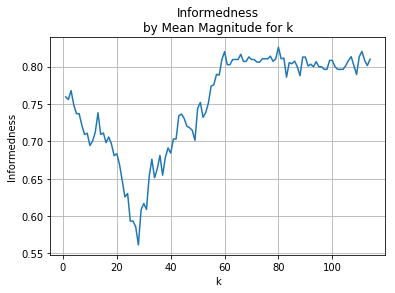

In [5]:
plt.plot(by_means.index, informedness)
plt.title('Informedness\nby Mean Magnitude for k')
plt.xlabel('k')
plt.ylabel('Informedness')
plt.grid()
plt.show()


The chart above shows informedness (true positive rate - false positive rate)for all k. The number of nearest neighbors to evaluate (k) that maximized informedness is 80.  
##### Analysis by count
The algorithm to determine class by cunt of nearest begins calculating the magnitude of each uncategorized point to each categorized point. The magnitudes are sorted from least to greatest. The assigned class has the most counts among all classes for a given k.  
Below is the analysis by count.

###### Confusion matrix for each k  
The table below shows the confusion matrix for each k and true and false positive rate. Additionally, the numbers of ties are presented.  

In [6]:
count = cc.confusion_matrix('./data/analyzed.csv', 
        'train_class', 'result_by_mag', 'M', 'B')
count.head()

,true_pos,true_neg,false_pos,false_neg,ties,tp_rate,fp_rate
k,,,,,,,
1,139,268,20,28,0,0.832335,0.069444
2,132,268,12,26,17,0.835443,0.042857
3,132,276,12,35,0,0.790419,0.041667
4,127,268,7,23,30,0.846667,0.025455
5,142,273,15,25,0,0.850299,0.052083


###### Analysis by count - ROC Plot

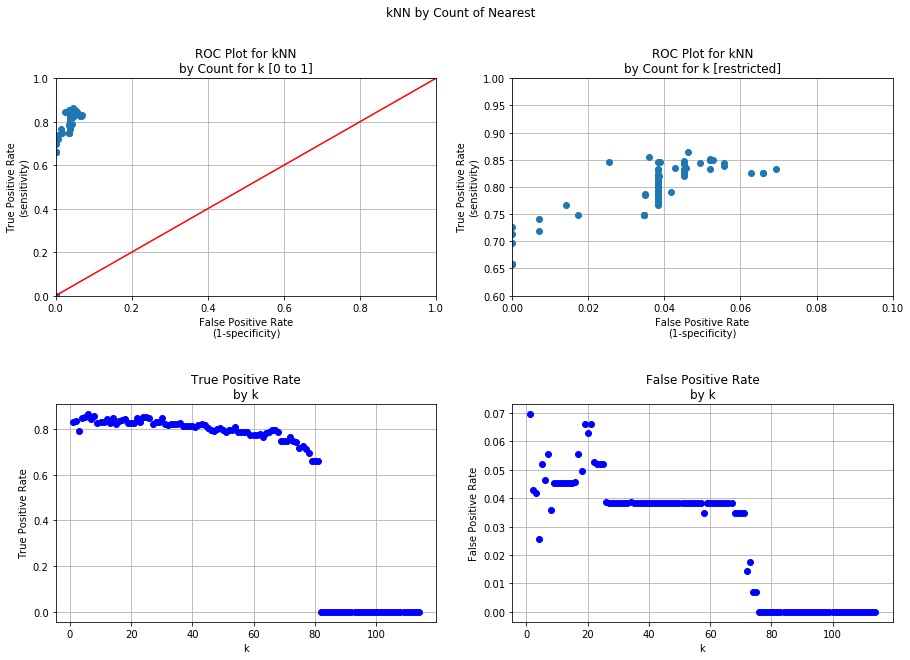

In [7]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, 
                wspace=None, hspace=0.5)
plt.suptitle('kNN by Count of Nearest')
plt.subplot(221)
plt.plot(count['fp_rate'], count['tp_rate'],'o')
plt.plot([0,1],[0,1],'r-')
plt.title('ROC Plot for kNN\nby Count for k [0 to 1]')
plt.xlabel('False Positive Rate\n(1-specificity)')
plt.ylabel('True Positive Rate\n(sensitivity)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.subplot(222)
plt.plot(count['fp_rate'], count['tp_rate'],'o')
plt.plot([0,1],[0,1],'r-')
plt.title('ROC Plot for kNN\nby Count for k [restricted]')
plt.xlabel('False Positive Rate\n(1-specificity)')
plt.ylabel('True Positive Rate\n(sensitivity)')
plt.xlim(0, 0.1)
plt.ylim(0.6, 1)
plt.grid()

plt.subplot(223)
plt.plot(count.index, count['tp_rate'],'bo')
plt.title('True Positive Rate\nby k')
plt.xlabel('k')
plt.ylabel('True Positive Rate')
plt.grid()

plt.subplot(224)
plt.plot(count.index, count['fp_rate'],'bo')
plt.title('False Positive Rate\nby k')
plt.xlabel('k')
plt.ylabel('False Positive Rate')
plt.grid()

plt.show()

The false positive rate (1-specificity):   $Rate_{FP} = N_{FP} / (N_{FP} + N_{TN})$ plotted against the true postive rate (sensitivity):  $Rate_{TP} = N_{TP} / (N_{TP} + N_{FN})$ are used to find the optimal k (number of neighbors to evaluate). Where the optimal k maximizes sensitivity and minimizes specificity.   
The charts above show the true positive rate and false positive rate for all values of k.   
###### Informedness

In [8]:
informedness = count['tp_rate'] - count['fp_rate']
opt = informedness.idxmax()
est_tp = count['tp_rate'][opt]
est_fp = count['fp_rate'][opt]


The table shows the optimal k, and estimated true and false positive rates. The optimal k was determined to be 4. Since k = 4 will produce ties, evaluation at k = 3 and k = 5 is also shown.   

|k|TPR|FPR|
|-|---|---|
|3|{{np.round(count['tp_rate'][3],2)}}|{{np.round(count['fp_rate'][3],2)}}|
|{{opt}}|{{np.round(est_tp,2)}}|{{np.round(est_fp,2)}}|
|5|{{np.round(count['tp_rate'][5],2)}}|{{np.round(count['fp_rate'][5],2)}}|

##### Comparisons of methods and SKLearn kNN

Confusion matrices:  

|By Means k=80|Predicted Pos|Predicted Neg|
|---|----|---|
|Actual Pos|{{by_means['true_pos'][80]}}|{{by_means['false_neg'][80]}}|
|Actual Neg|{{by_means['false_pos'][80]}}|{{by_means['true_neg'][80]}}|   



|By Counts k=5|Predicted Pos|Predicted Neg|
|---|----|---|
|Actual Pos|{{count['true_pos'][5]}}|{{count['false_neg'][5]}}|
|Actual Neg|{{count['false_pos'][5]}}|{{count['true_neg'][5]}}| 


In [9]:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
neigh_80 = KNeighborsClassifier(n_neighbors=80)
X = train[['mean_radius', 'mean_concave_points']]
y = train['diagnosis']
neigh_80.fit(X, y)
predicted_80 = neigh_80.predict(test[['mean_radius', 'mean_concave_points']])
confuse_80 = confusion_matrix(test['diagnosis'], predicted_80)

|By SKLearn k=80|Predicted Pos|Predicted Neg|
|---|----|---|
|Actual Pos|{{confuse_80[1,1]}}|{{confuse_80[1,0]}}|
|Actual Neg|{{confuse_80[0,1]}}|{{confuse_80[0,0]}}| 

Compare to kNN by means where total misclassification is 40 (26 false positives and 14 false negatives).

In [10]:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
neigh_5 = KNeighborsClassifier(n_neighbors=5)
X = train[['mean_radius', 'mean_concave_points']]
y = train['diagnosis']
neigh_5.fit(X, y)
predicted_5 = neigh_5.predict(test[['mean_radius', 'mean_concave_points']])
confuse_5 = confusion_matrix(test['diagnosis'], predicted_5)

|By SKLearn k=5|Predicted Pos|Predicted Neg|
|---|----|---|
|Actual Pos|{{confuse_5[1,1]}}|{{confuse_5[1,0]}}|
|Actual Neg|{{confuse_5[0,1]}}|{{confuse_5[0,0]}}| 

Compare to kNN by count where total misclassification is 40 (15 false positives and 25 false negatives).